                 主订单编号                子订单编号  \
0  6934177302770423185  6934177302770423185   
1  6934190430602007885  6934190430602007885   
2  6934168409959437494  6934168409959437494   
3  6934159686885840590  6934159686885840590   
4  6934179445937476928  6934179445937476928   

                                  选购商品         商品规格  商品数量  \
0  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
1  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
2  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
3  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
4     \t亚克力收纳盒学生桌面笔筒高颜值办公室摆件创意置物架透明书桌盒  \t透明色大五格收纳盒     1   

                  商品ID  商品单价  订单应付金额   运费  优惠总金额  ... 达人昵称 售后状态  取消原因  流量类型  \
0  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
1  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
2  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
3  3687499901589127386   9.9    9.

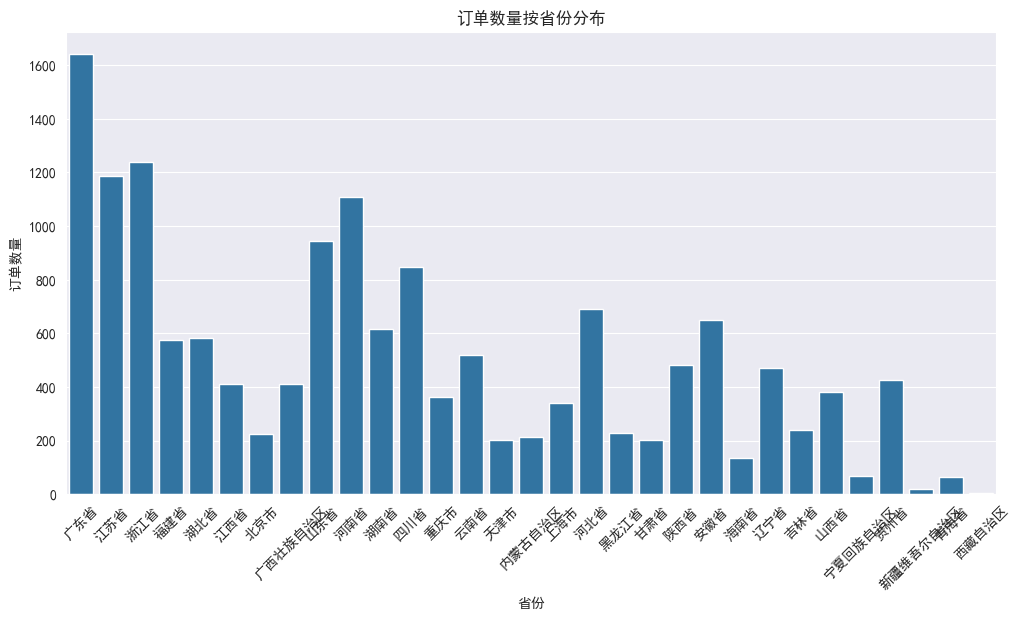

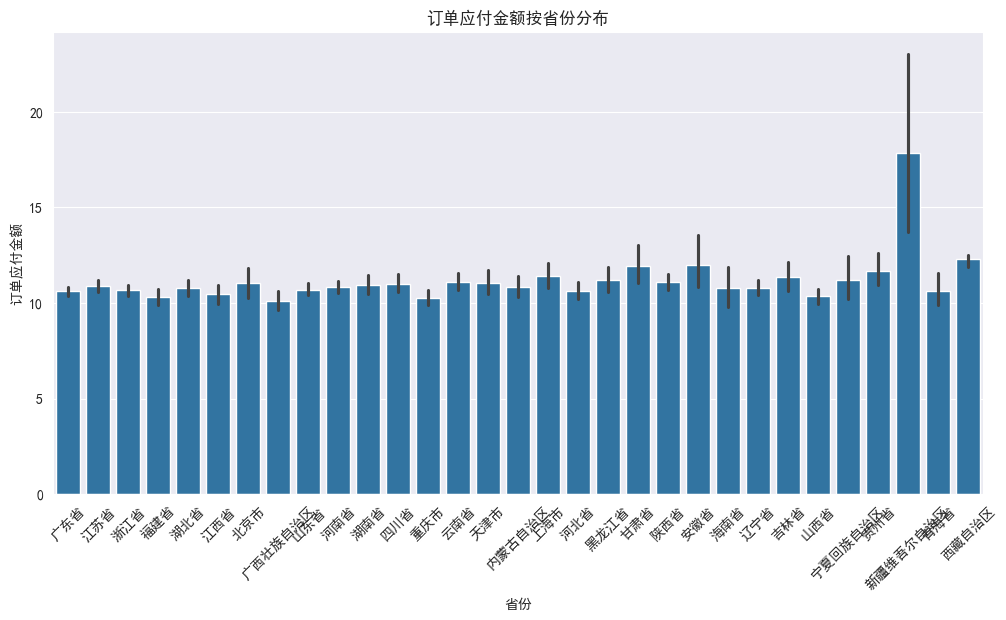

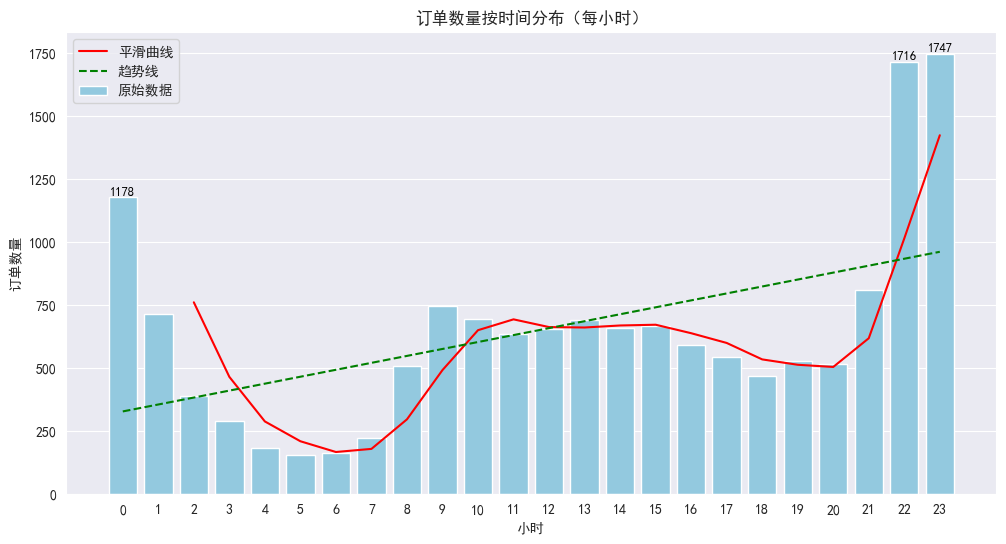

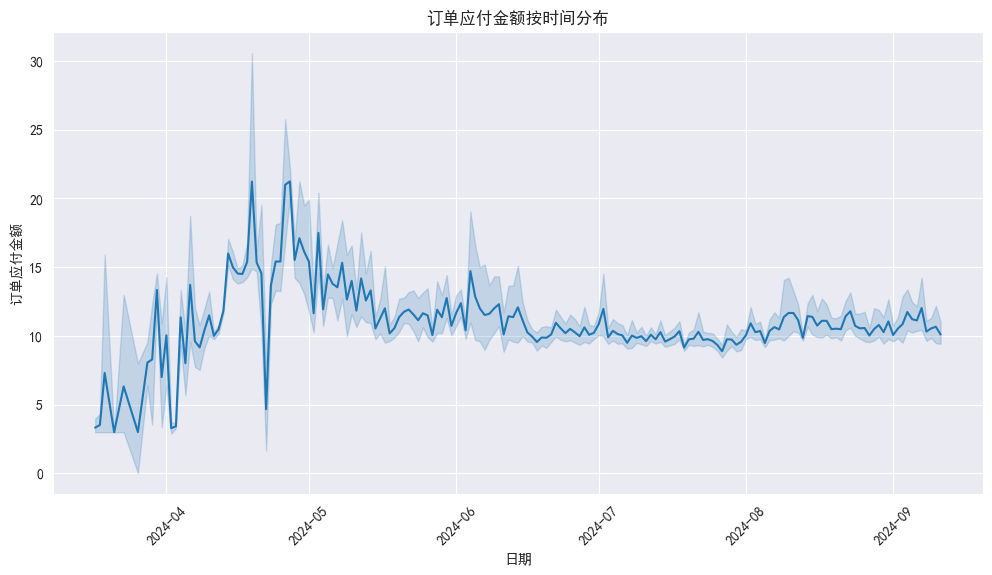

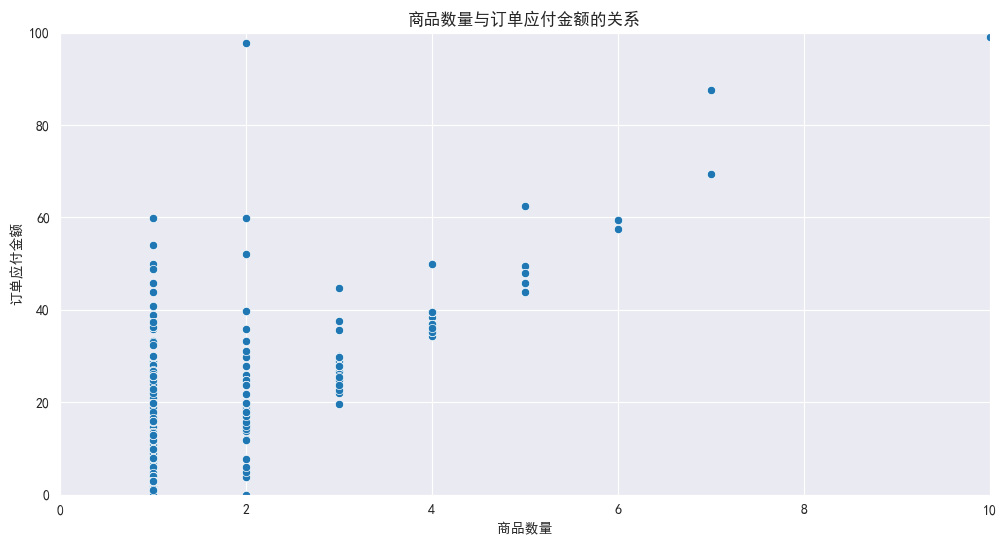

模型系数: [ 1.79322808 -0.60302445  0.65909133]
截距: 11.257127903322726


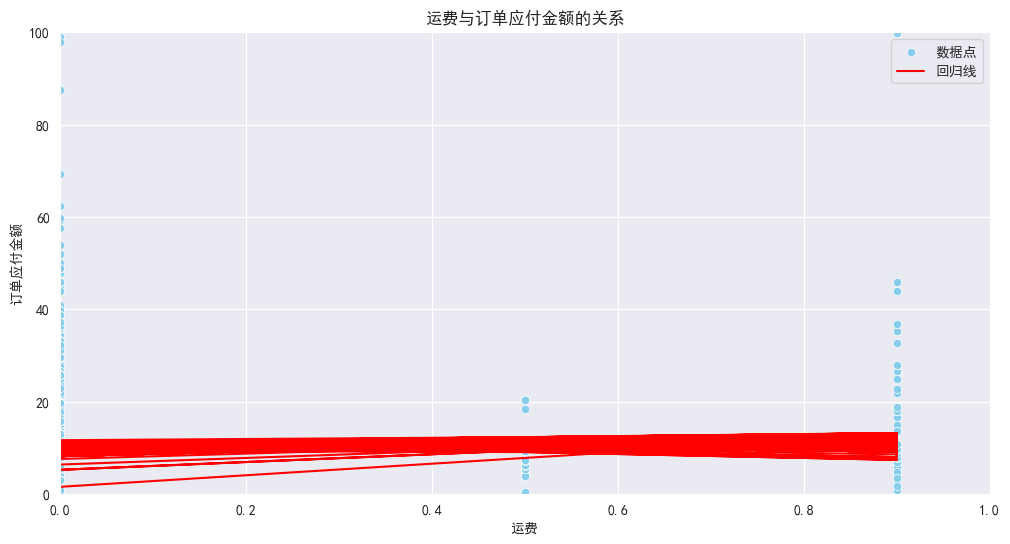

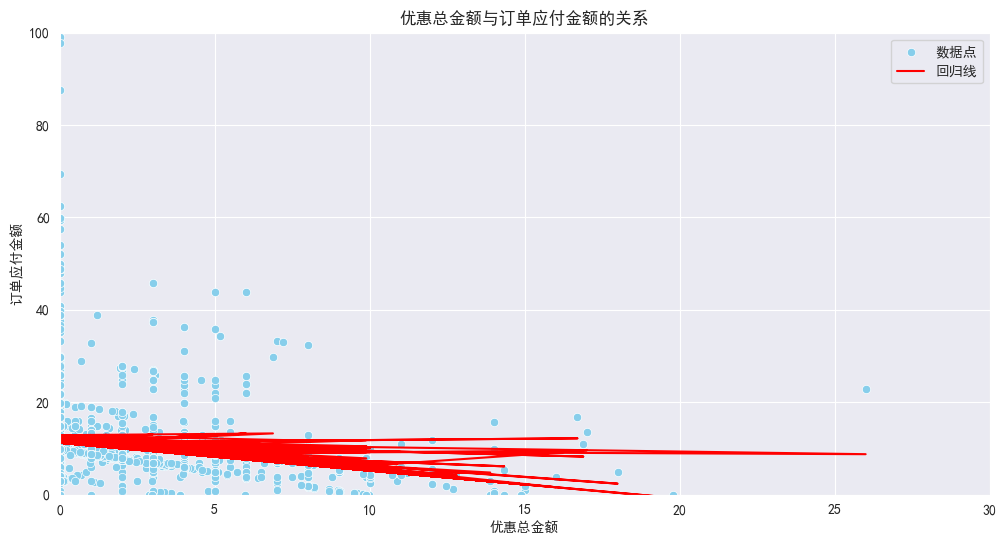

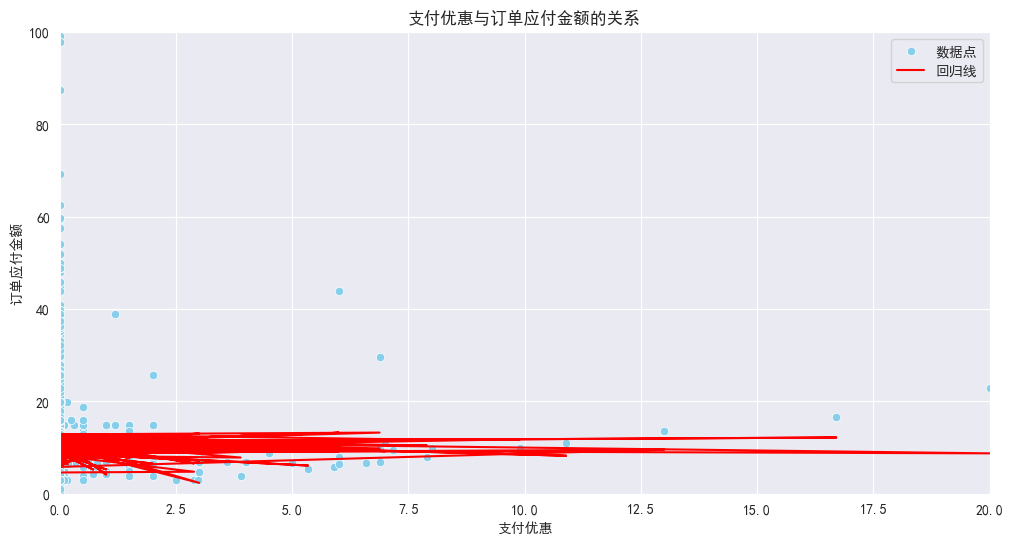

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 读取 CSV 文件
dy_sales = pd.read_csv(r'C:\Users\厉佳星\PycharmProjects\pythonProject2\pandas源码\douyinwangdian-select9.23.csv', encoding='utf_8')

# 显示前几行数据
print(dy_sales.head())

# 检查缺失值
print(dy_sales.isnull().sum())

# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 数据预处理
# 将时间列转换为 datetime 类型
dy_sales['订单提交时间'] = pd.to_datetime(dy_sales['订单提交时间'], errors='coerce')
dy_sales['订单完成时间'] = pd.to_datetime(dy_sales['订单完成时间'], errors='coerce')
dy_sales['支付完成时间'] = pd.to_datetime(dy_sales['支付完成时间'], errors='coerce')

# 提取日期部分
dy_sales['提交日期'] = dy_sales['订单提交时间'].dt.date
dy_sales['完成日期'] = dy_sales['订单完成时间'].dt.date
dy_sales['支付日期'] = dy_sales['支付完成时间'].dt.date

# 填充缺失值
dy_sales.fillna(0, inplace=True)

# 订单数量按省份分布
plt.figure(figsize=(12, 6))
sns.countplot(data=dy_sales, x='省')
plt.title('订单数量按省份分布')
plt.xlabel('省份')
plt.ylabel('订单数量')
plt.xticks(rotation=45)
plt.show()

# 订单应付金额按省份分布
plt.figure(figsize=(12, 6))
sns.barplot(data=dy_sales, x='省', y='订单应付金额')
plt.title('订单应付金额按省份分布')
plt.xlabel('省份')
plt.ylabel('订单应付金额')
plt.xticks(rotation=45)
plt.show()

# 订单数量按时间分布（每小时）
plt.figure(figsize=(12, 6))
# 提取小时信息
dy_sales['提交时间小时'] = dy_sales['订单提交时间'].dt.hour
# 计算每小时的订单数量
hourly_orders = dy_sales.groupby('提交时间小时').size().reset_index(name='订单数量')

# 平滑曲线
rolling_avg = hourly_orders['订单数量'].rolling(window=3).mean()

# 绘制原始数据
sns.barplot(data=hourly_orders, x='提交时间小时', y='订单数量', color='skyblue', label='原始数据')

# 绘制平滑曲线
plt.plot(hourly_orders['提交时间小时'], rolling_avg, color='red', label='平滑曲线')

# 添加趋势线
z = np.polyfit(hourly_orders['提交时间小时'], hourly_orders['订单数量'], 1)
p = np.poly1d(z)
plt.plot(hourly_orders['提交时间小时'], p(hourly_orders['提交时间小时']), color='green', linestyle='--', label='趋势线')

# 标注峰值
peaks = hourly_orders[hourly_orders['订单数量'] > hourly_orders['订单数量'].quantile(0.9)]
for index, row in peaks.iterrows():
    plt.text(row['提交时间小时'], row['订单数量'], f'{row["订单数量"]}', ha='center', va='bottom', fontsize=9, color='black')

# 设置 x 轴标签
plt.xticks(ticks=np.arange(24), labels=np.arange(24))

# 设置标题和标签
plt.title('订单数量按时间分布（每小时）')
plt.xlabel('小时')
plt.ylabel('订单数量')
plt.legend()

plt.show()

# 订单应付金额按时间分布
plt.figure(figsize=(12, 6))
sns.lineplot(data=dy_sales, x='提交日期', y='订单应付金额')
plt.title('订单应付金额按时间分布')
plt.xlabel('日期')
plt.ylabel('订单应付金额')
plt.xticks(rotation=45)
plt.show()

# 商品数量与订单应付金额的关系
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dy_sales, x='商品数量', y='订单应付金额')
plt.title('商品数量与订单应付金额的关系')
plt.xlabel('商品数量')
plt.ylabel('订单应付金额')
plt.xlim(0, 10)  # 设置 x 轴范围
plt.ylim(0, 100)  # 设置 y 轴范围
plt.show()

# 评估不同因素对订单应付金额的影响
# 准备数据
X = dy_sales[['运费', '优惠总金额', '支付优惠']]
y = dy_sales['订单应付金额']


# 创建线性回归模型
regressor = LinearRegression()
regressor.fit(X, y)

# 输出模型系数
print(f"模型系数: {regressor.coef_}")
print(f"截距: {regressor.intercept_}")

# 绘制回归结果
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dy_sales, x='运费', y='订单应付金额', color='skyblue', label='数据点')
plt.plot(X['运费'], regressor.predict(X), color='red', label='回归线')
plt.title('运费与订单应付金额的关系')
plt.xlabel('运费')
plt.ylabel('订单应付金额')
plt.xlim(0, 1)  # 设置 x 轴范围
plt.ylim(0, 100)  # 设置 y 轴范围
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=dy_sales, x='优惠总金额', y='订单应付金额', color='skyblue', label='数据点')
plt.plot(X['优惠总金额'], regressor.predict(X), color='red', label='回归线')
plt.title('优惠总金额与订单应付金额的关系')
plt.xlabel('优惠总金额')
plt.ylabel('订单应付金额')
plt.xlim(0, 30)  # 设置 x 轴范围
plt.ylim(0, 100)  # 设置 y 轴范围
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=dy_sales, x='支付优惠', y='订单应付金额', color='skyblue', label='数据点')
plt.plot(X['支付优惠'], regressor.predict(X), color='red', label='回归线')
plt.title('支付优惠与订单应付金额的关系')
plt.xlabel('支付优惠')
plt.ylabel('订单应付金额')
plt.xlim(0, 20)  # 设置 x 轴范围
plt.ylim(0, 100)  # 设置 y 轴范围
plt.legend()
plt.show()

                 主订单编号                子订单编号  \
0  6934177302770423185  6934177302770423185   
1  6934190430602007885  6934190430602007885   
2  6934168409959437494  6934168409959437494   
3  6934159686885840590  6934159686885840590   
4  6934179445937476928  6934179445937476928   

                                  选购商品         商品规格  商品数量  \
0  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
1  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
2  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
3  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
4     \t亚克力收纳盒学生桌面笔筒高颜值办公室摆件创意置物架透明书桌盒  \t透明色大五格收纳盒     1   

                  商品ID  商品单价  订单应付金额   运费  优惠总金额  ... 达人昵称 售后状态  取消原因  流量类型  \
0  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
1  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
2  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
3  3687499901589127386   9.9    9.

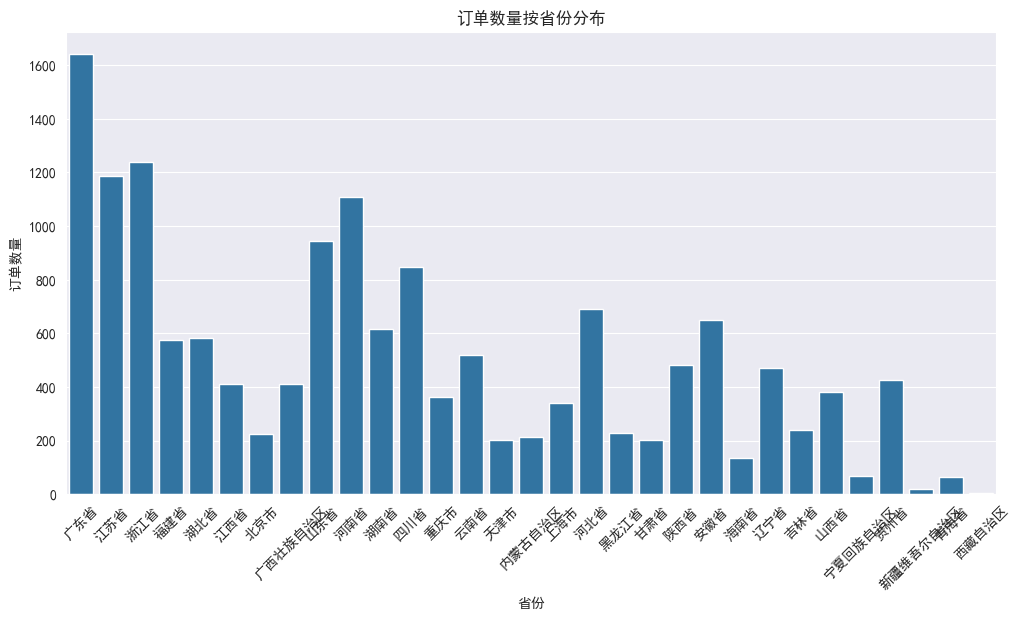

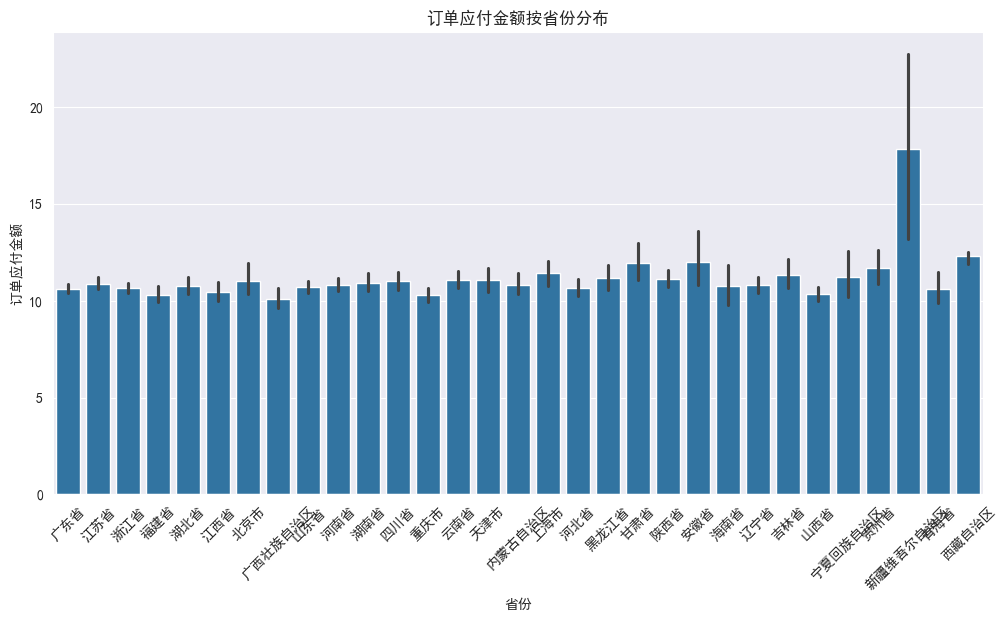

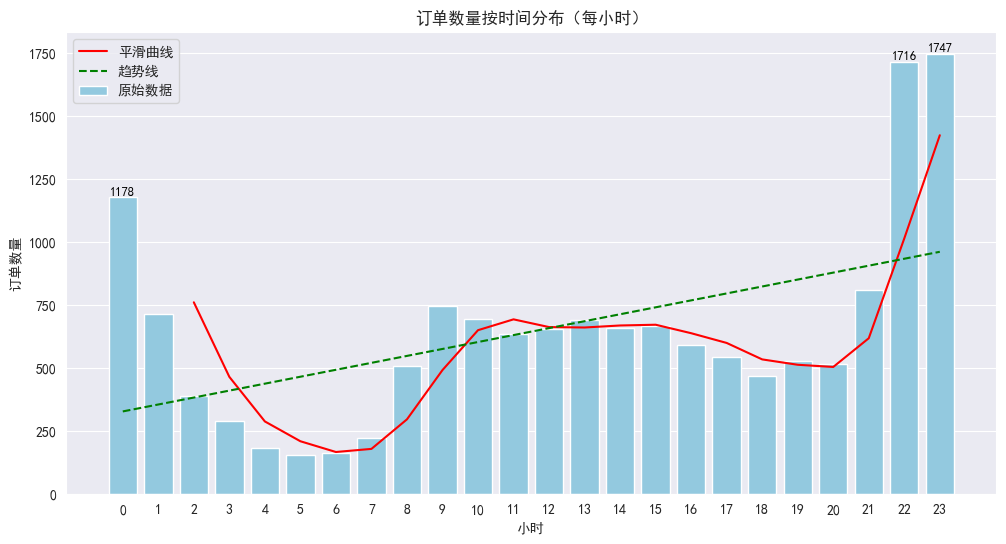

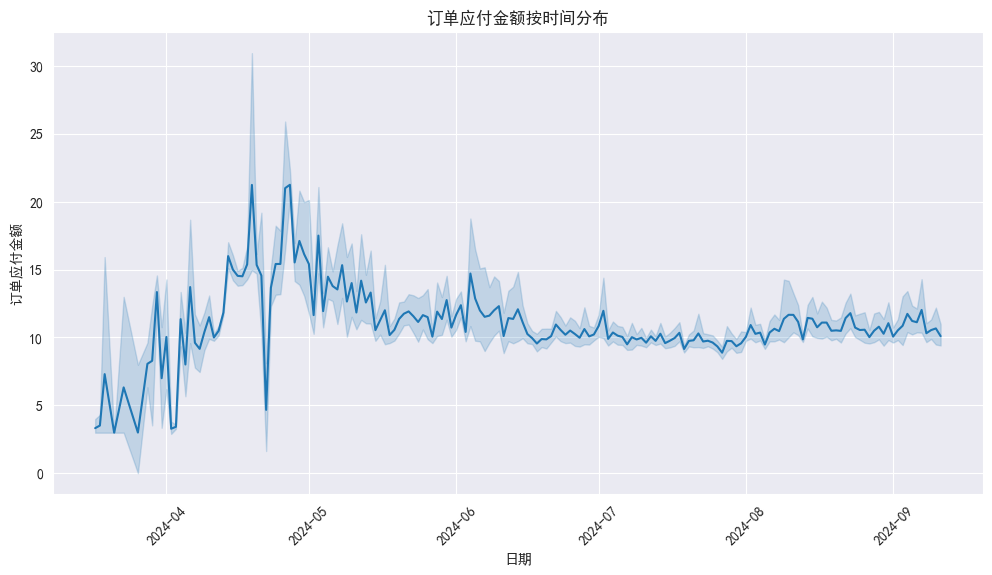

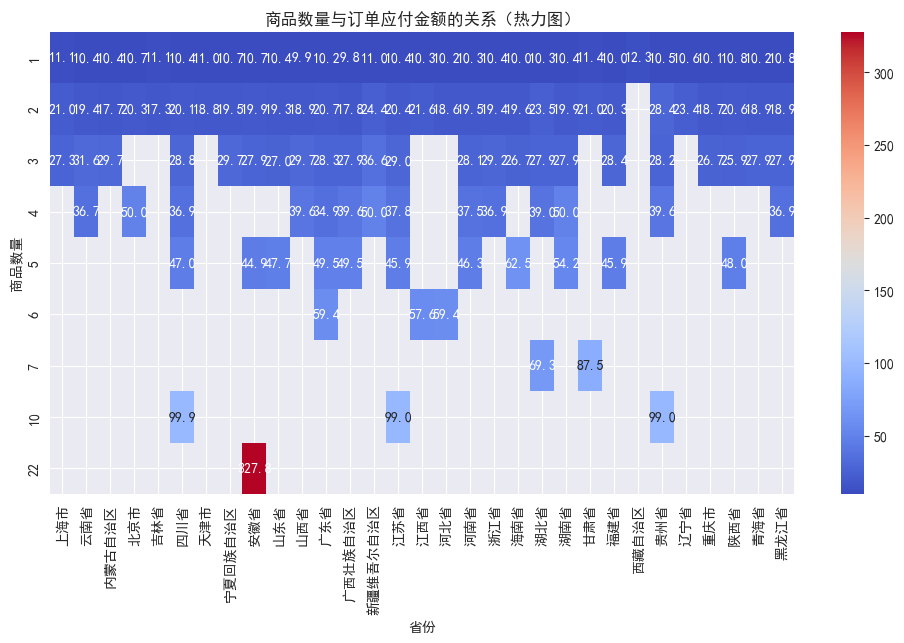

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 读取 CSV 文件
csv_path = r'C:\Users\厉佳星\PycharmProjects\pythonProject2\pandas源码\douyinwangdian-select9.23.csv'
output_folder = r'C:\Users\厉佳星\PycharmProjects\pythonProject2\pandas源码\图片'

# 读取 CSV 文件
dy_sales = pd.read_csv(csv_path, encoding='utf_8')

# 显示前几行数据
print(dy_sales.head())

# 检查缺失值
print(dy_sales.isnull().sum())

# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 数据预处理
# 将时间列转换为 datetime 类型
dy_sales['订单提交时间'] = pd.to_datetime(dy_sales['订单提交时间'], errors='coerce')
dy_sales['订单完成时间'] = pd.to_datetime(dy_sales['订单完成时间'], errors='coerce')
dy_sales['支付完成时间'] = pd.to_datetime(dy_sales['支付完成时间'], errors='coerce')

# 提取日期部分
dy_sales['提交日期'] = dy_sales['订单提交时间'].dt.date
dy_sales['完成日期'] = dy_sales['订单完成时间'].dt.date
dy_sales['支付日期'] = dy_sales['支付完成时间'].dt.date

# 填充缺失值
dy_sales.fillna(0, inplace=True)

# 订单数量按省份分布
plt.figure(figsize=(12, 6))
sns.countplot(data=dy_sales, x='省')
plt.title('订单数量按省份分布')
plt.xlabel('省份')
plt.ylabel('订单数量')
plt.xticks(rotation=45)
plt.savefig(f'{output_folder}\\订单数量按省份分布.png')
plt.show()

# 订单应付金额按省份分布
plt.figure(figsize=(12, 6))
sns.barplot(data=dy_sales, x='省', y='订单应付金额')
plt.title('订单应付金额按省份分布')
plt.xlabel('省份')
plt.ylabel('订单应付金额')
plt.xticks(rotation=45)
plt.savefig(f'{output_folder}\\订单应付金额按省份分布.png')
plt.show()

# 订单数量按时间分布（每小时）
plt.figure(figsize=(12, 6))
# 提取小时信息
dy_sales['提交时间小时'] = dy_sales['订单提交时间'].dt.hour
# 计算每小时的订单数量
hourly_orders = dy_sales.groupby('提交时间小时').size().reset_index(name='订单数量')

# 平滑曲线
rolling_avg = hourly_orders['订单数量'].rolling(window=3).mean()

# 绘制原始数据
sns.barplot(data=hourly_orders, x='提交时间小时', y='订单数量', color='skyblue', label='原始数据')

# 绘制平滑曲线
plt.plot(hourly_orders['提交时间小时'], rolling_avg, color='red', label='平滑曲线')

# 添加趋势线
z = np.polyfit(hourly_orders['提交时间小时'], hourly_orders['订单数量'], 1)
p = np.poly1d(z)
plt.plot(hourly_orders['提交时间小时'], p(hourly_orders['提交时间小时']), color='green', linestyle='--', label='趋势线')

# 标注峰值
peaks = hourly_orders[hourly_orders['订单数量'] > hourly_orders['订单数量'].quantile(0.9)]
for index, row in peaks.iterrows():
    plt.text(row['提交时间小时'], row['订单数量'], f'{row["订单数量"]}', ha='center', va='bottom', fontsize=9, color='black')

# 设置 x 轴标签
plt.xticks(ticks=np.arange(24), labels=np.arange(24))

# 设置标题和标签
plt.title('订单数量按时间分布（每小时）')
plt.xlabel('小时')
plt.ylabel('订单数量')
plt.legend()
plt.savefig(f'{output_folder}\\订单数量按时间分布.png')
plt.show()

# 订单应付金额按时间分布
plt.figure(figsize=(12, 6))
sns.lineplot(data=dy_sales, x='提交日期', y='订单应付金额')
plt.title('订单应付金额按时间分布')
plt.xlabel('日期')
plt.ylabel('订单应付金额')
plt.xticks(rotation=45)
plt.savefig(f'{output_folder}\\订单应付金额按时间分布.png')
plt.show()

# 商品数量与订单应付金额的关系（热力图）
plt.figure(figsize=(12, 6))
# 创建一个交叉表
pivot_table = pd.pivot_table(dy_sales, values='订单应付金额', index='商品数量', columns='省', aggfunc=np.mean)

# 绘制热力图
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm', cbar=True)
plt.title('商品数量与订单应付金额的关系（热力图）')
plt.xlabel('省份')
plt.ylabel('商品数量')
plt.savefig(f'{output_folder}\\商品数量与订单应付金额的关系（热力图）.png')
plt.show()


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 读取 CSV 文件
csv_path = r'C:\Users\厉佳星\PycharmProjects\pythonProject2\pandas源码\douyinwangdian-select9.23.csv'
output_folder = r'C:\Users\厉佳星\PycharmProjects\pythonProject2\pandas源码\图片'

# 读取 CSV 文件
dy_sales = pd.read_csv(csv_path, encoding='utf_8')

# 显示前几行数据
print(dy_sales.head())

# 检查缺失值
print(dy_sales.isnull().sum())

# 数据预处理
# 将时间列转换为 datetime 类型
dy_sales['订单提交时间'] = pd.to_datetime(dy_sales['订单提交时间'], errors='coerce')
dy_sales['订单完成时间'] = pd.to_datetime(dy_sales['订单完成时间'], errors='coerce')
dy_sales['支付完成时间'] = pd.to_datetime(dy_sales['支付完成时间'], errors='coerce')

# 提取日期部分
dy_sales['提交日期'] = dy_sales['订单提交时间'].dt.date
dy_sales['完成日期'] = dy_sales['订单完成时间'].dt.date
dy_sales['支付日期'] = dy_sales['支付完成时间'].dt.date

# 填充缺失值
dy_sales.fillna(0, inplace=True)

# 选择数值型变量
numeric_variables = [
    '商品数量',
    '商品单价',
    '订单应付金额',
    '运费',
    '优惠总金额',
    '平台优惠',
    '商家优惠',
    '支付优惠',
    '红包抵扣',
    '降价类优惠',
    '平台实际承担优惠金额',
    '商家实际承担优惠金额'
]

# 计算相关性矩阵
correlation_matrix = dy_sales[numeric_variables].corr()

# 绘制相关性热力图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('数值型变量的相关性热力图')
plt.savefig(f'{output_folder}\\数值型变量的相关性热力图.png')
plt.show()

# 线性回归分析
# 选择因变量和自变量
X = dy_sales[numeric_variables]
y = dy_sales['订单应付金额']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 绘制预测结果与真实值的关系
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('线性回归预测结果')
plt.savefig(f'{output_folder}\\线性回归预测结果.png')
plt.show()


                 主订单编号                子订单编号  \
0  6934177302770423185  6934177302770423185   
1  6934190430602007885  6934190430602007885   
2  6934168409959437494  6934168409959437494   
3  6934159686885840590  6934159686885840590   
4  6934179445937476928  6934179445937476928   

                                  选购商品         商品规格  商品数量  \
0  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
1  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
2  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
3  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
4     \t亚克力收纳盒学生桌面笔筒高颜值办公室摆件创意置物架透明书桌盒  \t透明色大五格收纳盒     1   

                  商品ID  商品单价  订单应付金额   运费  优惠总金额  ... 达人昵称 售后状态  取消原因  流量类型  \
0  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
1  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
2  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
3  3687499901589127386   9.9    9.

ValueError: could not convert string to float: '-'